In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb 

#데이터 정상성확인을 위한 ADF 검정
from statsmodels.tsa.stattools import adfuller

In [2]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [3]:
origin = load_data('air_passengers')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n===== 타입확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기: (144, 2)
열 개수: 2
행 개수: 144

===== 타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


# 데이터 전처리

In [5]:
df1 = origin.set_index("Month")
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# 데이터의 정상성 확인

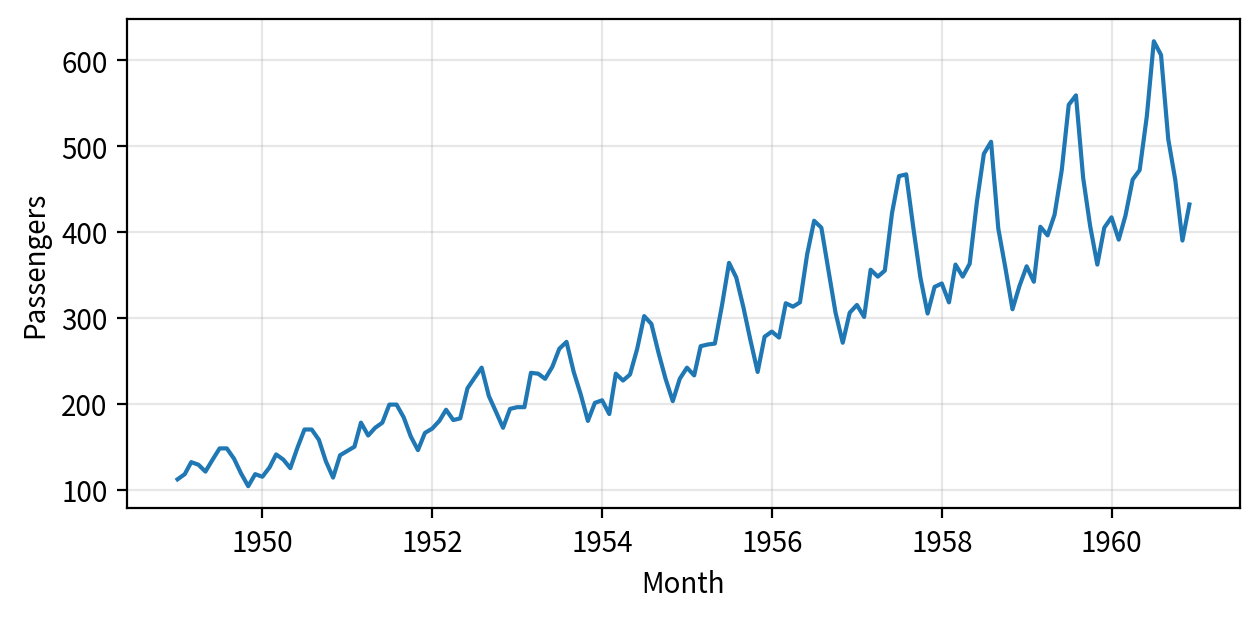

In [6]:
width_px = 1280
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.lineplot(data=df1, x=df1.index, y='Passengers')


ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
plt.close()

파형이 증가하는 추세를 보이고 있으므로 정상성이 충족되지 않는다.
# ADF 테스트

In [8]:
ar = adfuller(df1['Passengers'])
ar

(np.float64(0.8153688792060482),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [9]:
print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values): ')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부:', '정상성 충족' if ar[1] <=0.05 else '정상성 충족 안함')

검정통계량(ADF Statistic): 0.815369
유의수준(p-value): 0.991880
최적차수(num of lags): 13.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values): 
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부: 정상성 충족 안함


데이터가 정상성을 충족하지 않기 때문에 차분을 통해 정상성을 충족하는 형태로 전처리를 수행해야 한다.
# 차분
1번째 값은 이전 값이 없으므로 결측치가 발생함-> 제거해야 함

In [10]:
df2 = df1.diff().dropna()
df2

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


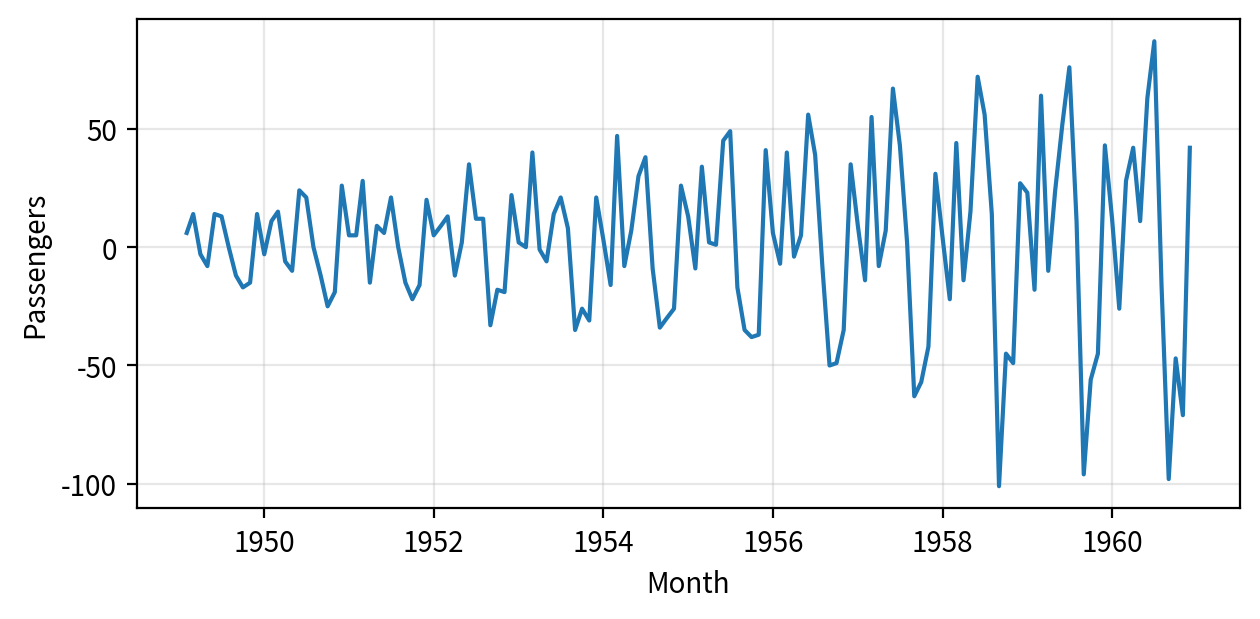

검정통계량(ADF Statistic): -2.829267
유의수준(p-value): 0.054213
최적차수(num of lags): 12.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values): 
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부: 정상성 충족 안함


In [12]:
width_px = 1280
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.lineplot(data=df2, x=df2.index, y='Passengers')


ax.grid(True,alpha=0.3)


plt.tight_layout()
plt.show()
plt.close()

#ADF검정
ar = adfuller(df2['Passengers'])

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values): ')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부:', '정상성 충족' if ar[1] <=0.05 else '정상성 충족 안함')

# 2차 차분
정상성을 충족 될 때까지 진행해야 한다. 

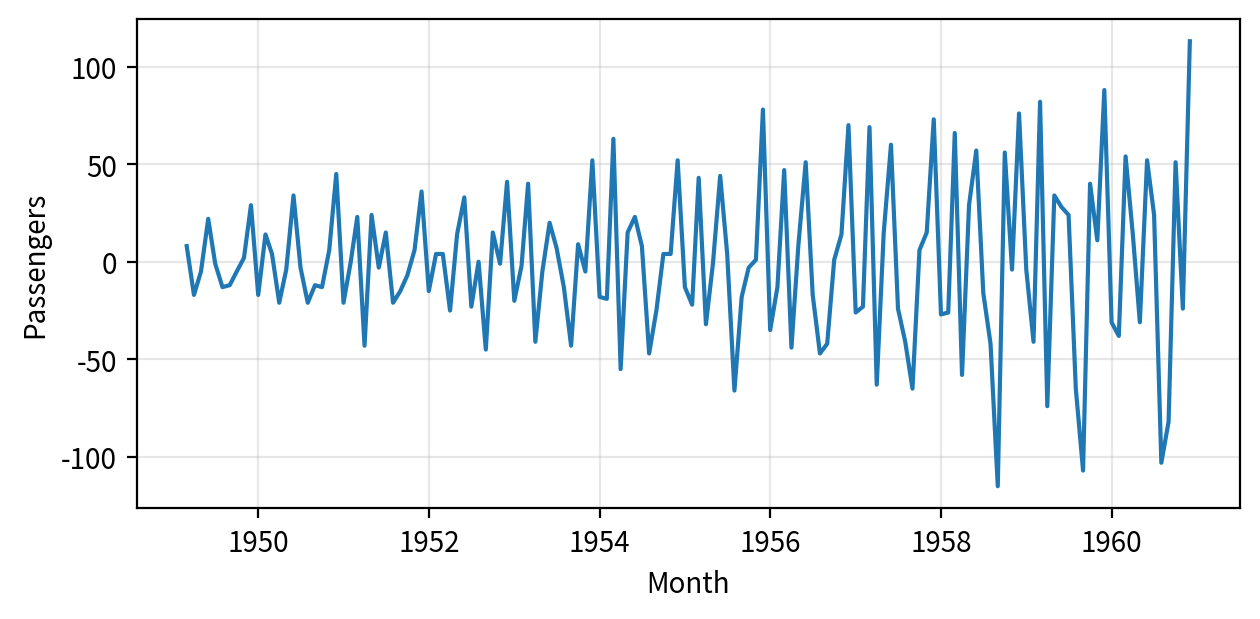

검정통계량(ADF Statistic): -16.384232
유의수준(p-value): 0.000000
최적차수(num of lags): 11.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values): 
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부: 정상성 충족


In [13]:
df3 = df2.diff().dropna()

width_px = 1280
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.lineplot(data=df3, x=df3.index, y='Passengers')


ax.grid(True,alpha=0.3)


plt.tight_layout()
plt.show()
plt.close()

#ADF 검정
ar = adfuller(df3['Passengers'])

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values): ')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부:', '정상성 충족' if ar[1] <=0.05 else '정상성 충족 안함')

1.데이터 전처리
2.데이터의 정상성 확인(시각화,adf테스트)
3.정상성을 충족하지x-> 차분을 통해 정상성을 충족하는 형태로 전처리 수행